In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- If youve already done this for Ne, you dont need to do here too

In [21]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [22]:
import DiadFit as pf
pf.__version__

'0.0.23'

In [23]:
# Add the path with your spectra in
meta_path=r'/Users/kyledayton/Downloads/09.14.22 LM0 MI for Diad Fit/Text Files'
spectra_path=r'/Users/kyledayton/Downloads/09.14.22 LM0 MI for Diad Fit/Spectra/Weak MI and FI'


In [24]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt'
# Specifying the extension here helps to filter out other file types,
# e.g. png files that may be in the folder
file_ext='.txt'
# If your instrument appends a nubmer like 01, 02 to each file, prefix=True removes it
prefix=False

## This function finds all files in your path with the specified file format
- As you will fit your Ne lines in a different workbook, you can use 'exclude_str' to put any text that appears in all your Ne files, and it won't look here

In [26]:
Diad_files=pf.get_diad_files(path=spectra_path, file_ext=file_ext, exclude_str='NE ',
                            exclude_str_2='NO CO2')
Diad_files[0:50]

exclude type
.png


['06 LM0 G2 MI1.txt',
 '10 LM0 G3 MI1.txt',
 '16 LM0 G7 MI1 CARBS.txt',
 '18 LM0 G7 MI2 CARBS.txt',
 '20 LM0 G9 MI1.txt',
 '32 LM0 G20 FI1.txt',
 '34 LM0 G20 FI2.txt',
 '44 LM0 G20 FI7.txt',
 '50 LM0 G20 FI10.txt',
 '57 LM0 G21 MI1.txt',
 '59 LM0 G21 MI2.txt',
 '63 LM0 G22 MI1 BUBBLE 2 OF 2.txt',
 '65 LM0 G22 MI2.txt',
 '69 LM0 G23 MI1.txt',
 '82 LM0 G25 MI3.txt',
 '85 LM0 G27 MI1.txt']

## Must be a way of filtering them on strength...

In [27]:
max_diad1=np.empty(len(Diad_files), dtype=float)
max_diad2=np.empty(len(Diad_files), dtype=float)
index_diad=np.empty(len(Diad_files), dtype=float)
i=0
for file in Diad_files:
    
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    
    Med_LHS_diad1=np.nanmedian(Diad[(Diad[:, 0]>1180)& (Diad[:, 0]<1220)])
    Med_RHS_diad1=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1350)])
    Med_LHS_diad2=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1360)])
    Med_RHS_diad2=np.nanmedian(Diad[(Diad[:, 0]>1440)& (Diad[:, 0]<1470)])    
    #Med_central_back_diad2=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1350)]
    
    Diad_diad1=Diad[(Diad[:, 0]>1280)& (Diad[:, 0]<1295)]
    Diad_diad2=Diad[(Diad[:, 0]>1385)& (Diad[:, 0]<1395)]
    max_diad1[i]=np.max(Diad_diad1[:, 1])-  (Med_LHS_diad1+Med_RHS_diad1)/2       
    max_diad2[i]=np.max(Diad_diad2[:, 1]) - (Med_LHS_diad2+Med_RHS_diad2)/2 
    index_diad[i]=i
    i=i+1


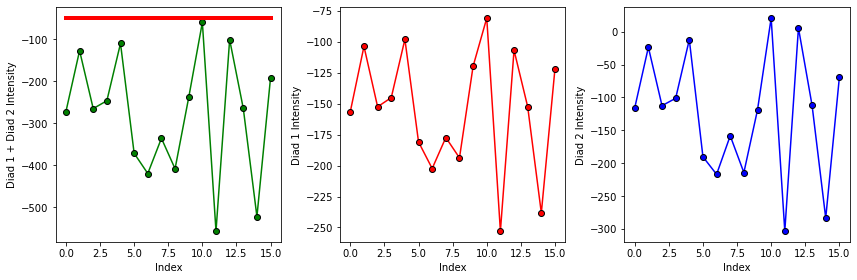

In [28]:
fig, (ax3, ax1, ax2) = plt.subplots(1, 3, figsize=(12,4))

combo_cutoff=-50

ax1.set_xlabel('Index')
ax2.set_xlabel('Index')
ax3.set_xlabel('Index')
ax3.set_ylabel('Diad 1 + Diad 2 Intensity')
ax2.set_ylabel('Diad 2 Intensity')
ax1.set_ylabel('Diad 1 Intensity')

ax1.plot(index_diad, max_diad1,  '-r')
ax1.plot(index_diad, max_diad1,  'ok', mfc='red')

ax2.plot(index_diad, max_diad2,  '-b')
ax2.plot(index_diad, max_diad2,  'ok', mfc='blue')

ax3.plot(index_diad, max_diad2+max_diad1,  '-g')
ax3.plot(index_diad, max_diad2+max_diad1,  'ok', mfc='green')
ax3.plot([np.min(index_diad), np.max(index_diad)],
         [combo_cutoff, combo_cutoff], '-r', lw=4)

## This gets dense diad files
Diad_Files_Dense=list(pd.Series(Diad_files).loc[(max_diad2+max_diad1)>combo_cutoff])
Diad_Files_Weak=list(pd.Series(Diad_files).loc[(max_diad2+max_diad1)<=combo_cutoff])

# ax1.set_yscale('log')
# ax2.set_yscale('log')
# ax3.set_yscale('log')
fig.tight_layout()

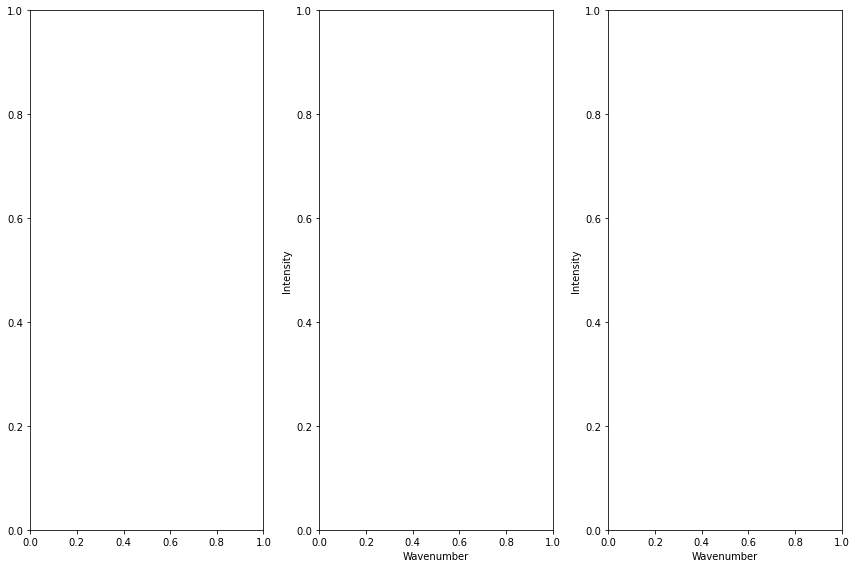

In [29]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,8))
i=0
lw=1
for file in Diad_Files_Dense:
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    ax0.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=0.5)
    ax1.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=1)
    ax1.set_xlim([1250, 1325])  
    
    ax2.set_title('Diad2')
    ax2.plot(Diad[:, 0],Diad[:, 1]+i, '-', lw=1)
    ax2.set_xlim([1370, 1420])
    i=i+1000
    
#ax0.set_xlabel('Wavenumber')
#ax0.set_ylabel('Intensity')
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Intensity')
ax2.set_xlabel('Wavenumber')
ax2.set_ylabel('Intensity')   
fig.tight_layout()

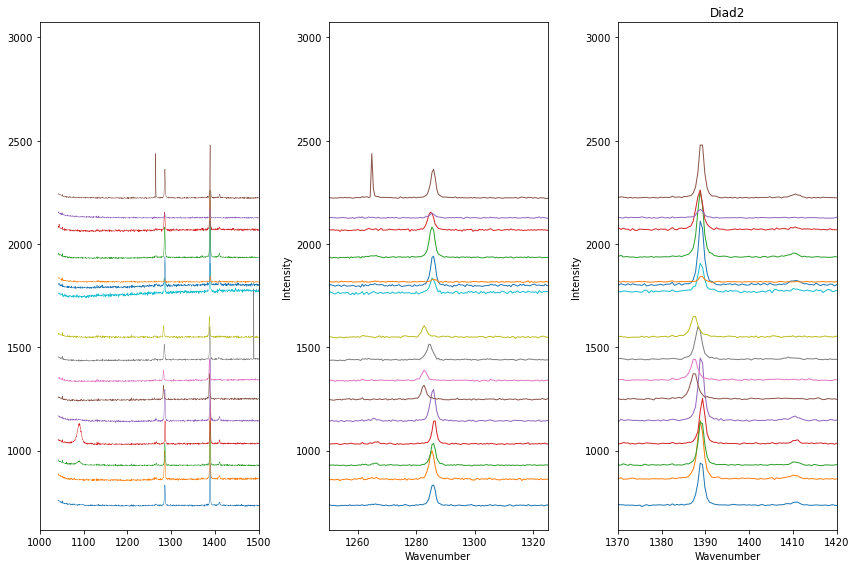

In [30]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,8))
i=0
lw=1
ax0.set_xlim([1000, 1500])
for file in Diad_Files_Weak:
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    ax0.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=0.5)
    ax1.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=1)
    ax1.set_xlim([1250, 1325])  
    
    ax2.set_title('Diad2')
    ax2.plot(Diad[:, 0],Diad[:, 1]+i, '-', lw=1)
    ax2.set_xlim([1370, 1420])
    i=i+100
    
#ax0.set_xlabel('Wavenumber')
#ax0.set_ylabel('Intensity')
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Intensity')
ax2.set_xlabel('Wavenumber')
ax2.set_ylabel('Intensity')   
fig.tight_layout()

## Weak Diads first
- This allows you to tweak parameters for your spectra and your instrument

In [31]:
filename=Diad_Files_Weak[0] #'23 MP2_2_MIB_12mW.txt'#  # This finds the first file

# Alternatively, you can specify the actual file name if you want to fit a specific one
#filename='007_k9.csv'
print(filename)

06 LM0 G2 MI1.txt


## First we plot the spectra
- This lets you look at the spectra, decide how strong your hotbands are, and see how elevated the diads are (if they are very elevated, you may need to fit a gaussian background too)

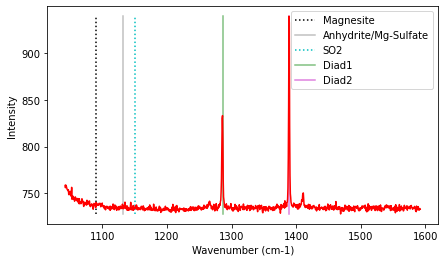

In [32]:
pf.plot_diad(path=spectra_path, filename=filename, filetype=filetype)

## After inspecting the spectra, decide if you want to fit the carbonate peak
- First, look at the presets, you can edit them in carb_peak_config by typing the variable name, and a new value

In [33]:
# Decide if you want to fit a carbonate peak or not here. 
fit_carbonate=False

# Tweak options here, can exclude a range for example using exclude_range=Tuple[float, float]
Carb_Config=pf.carb_peak_config(lower_bck=(1060, 1065), upper_bck=(1120, 1330))
Carb_Config   

carb_peak_config(lower_bck=(1060, 1065), upper_bck=(1120, 1330), N_poly_carb_bck=1, amplitude=1000, cent_carbonate=1090, outlier_sigma=12, N_peaks=3, distance=10, prominence=5, width=6, threshold=0.1, exclude_range=None, dpi=100, plot_figure=True)

## This actually does the work fitting the carbonate peak

In [34]:
Carb_fit=pf.fit_carbonate_peak(config=Carb_Config, path=spectra_path, 
filename=filename, filetype=filetype,
fit_carbonate=fit_carbonate)
Carb_fit

## Now lets plot the diads
- As with carbonate, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

In [35]:
diad_id_config=pf.diad_id_config(height=50)
diad_id_config

diad_id_config(exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1295), height=50, distance=5, threshold=0.5, width=0.5, prominence=10, plot_figure=True)

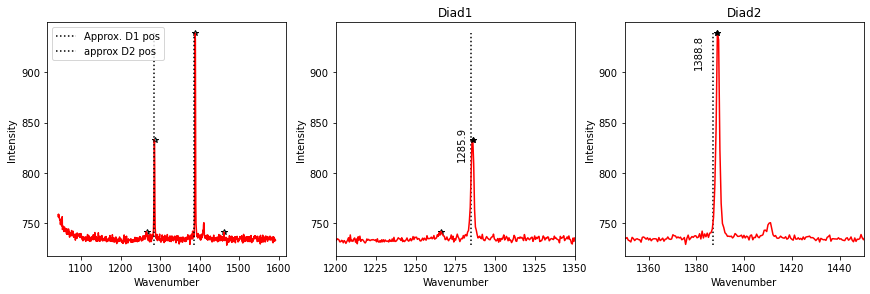

In [36]:
# Specify the number of peaks, 1 = just peak, 2 = Peak+hot bands
n_peaks_diad1=1
n_peaks_diad2=1 

    
diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config, path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2)

In [37]:
diad2_peaks

(1388.805794,)

## If you have no diads visible...
- change True to False, and it will just save the carbonate peak parameters

In [38]:
diads_present=True
pf.proceed_to_fit_diads(filename, Carb_fit, diads_present=diads_present)

Move on to fit diads


## Fit Diad 1
- This function uses the guess of the peak parameters above. 
- For very dense diads, you may need to fit a gaussian background, defined by peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000
- Otherwise, the background is fitted with a polynomial you can set the degree for (Default =1) based on background positoins defined by lower_bck, upper_bck...
- If plot_figure=True, it saves the figure in its own folder in the path, so you can inspect all the fits at a later date. 

In [39]:
diad1_fit_config=pf.diad1_fit_config(x_range_residual=10, x_range_baseline=10,
                                    HB_amplitude=5, diad_amplitude=100)
diad1_fit_config

diad1_fit_config(peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.2, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1300, 1350), diad_amplitude=100, HB_amplitude=5, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1
0,1285.659741,280.811359,0.557348,0.557348,1.576263


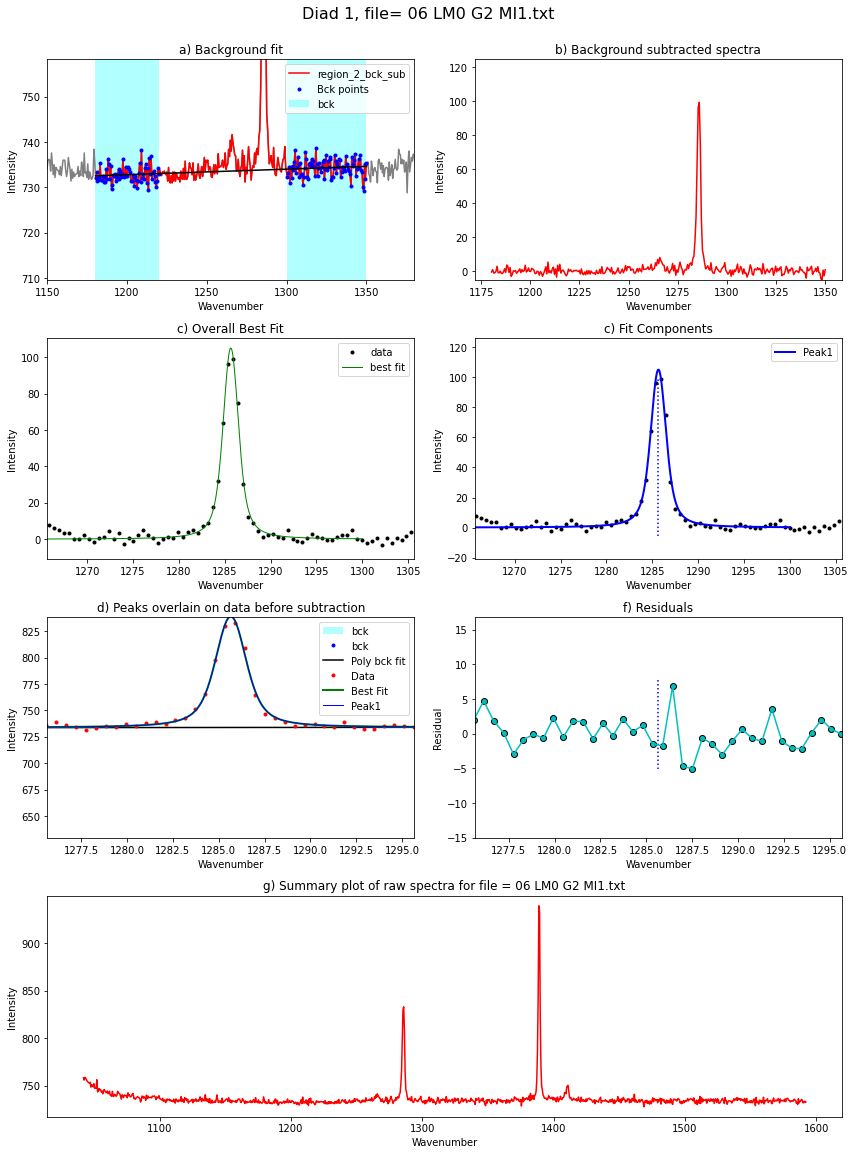

In [40]:
# For very dense spectra, with a very elevated background, you'll need to add a gaussian fit
# If you put a number in brackets, it'll center a gaussian extra background near there. 


# This function does the work fitting the diad
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=False)
Diad1_fit

## Fit diad 2

In [41]:
diad2_fit_config=pf.diad2_fit_config(x_range_residual=10, x_range_baseline=10)
diad2_fit_config

diad2_fit_config(peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.2, N_poly_bck_diad2=1, lower_bck_diad2=(1300, 1360), upper_bck_diad2=(1440, 1470), diad_amplitude=100, HB_amplitude=20, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2
0,1389.018641,440.754209,0.415666,0.415666,2.077049


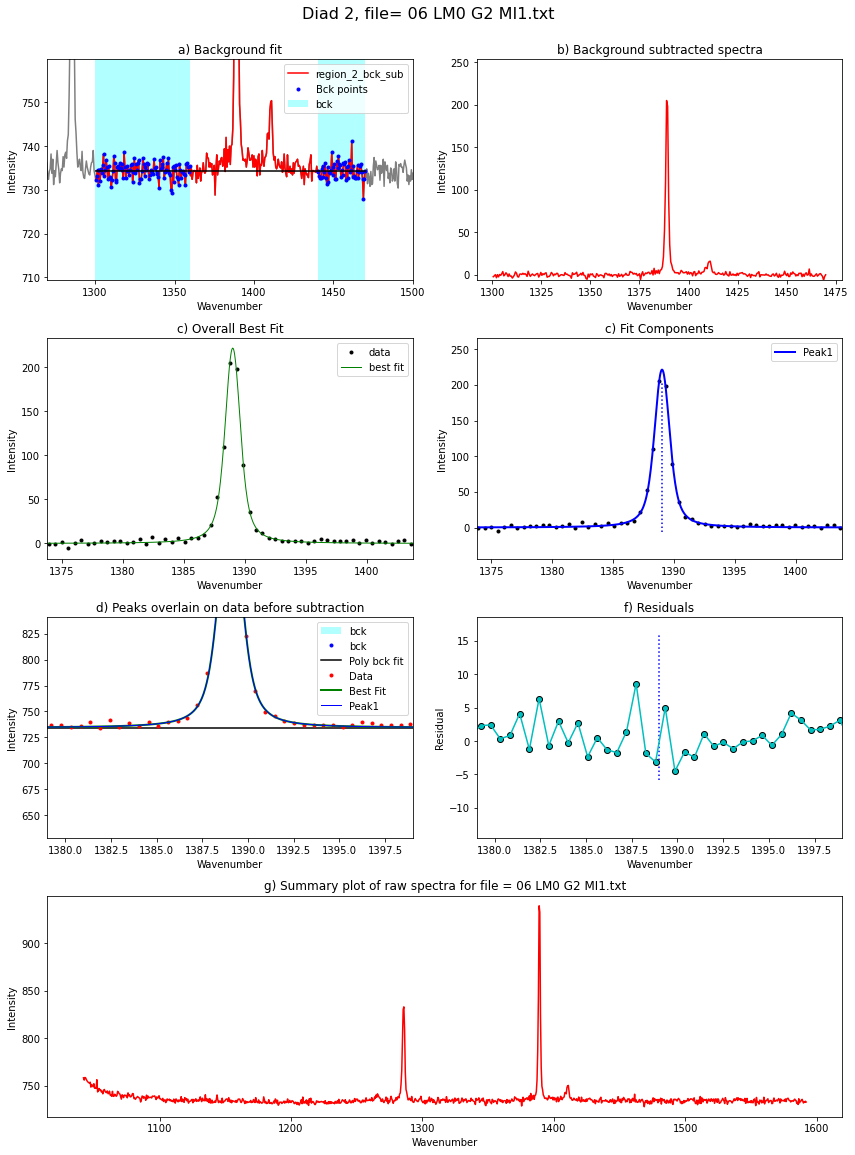

In [42]:
# Do you want to save the figure?
# This function does the work fitting the diad
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad2_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=False)
Diad2_fit

## Combine and save
- Saves to clipboard if to_clipboard=True (e.g. you can paste into a spreadsheet)
- Also saves to 'csv' in a folder in "spectra_path" if to_csv=True)
- It also makes a new 

In [43]:
out=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, to_clipboard=True, to_csv=True, path=spectra_path,
Diad2_fit=Diad2_fit, Carb_fit=Carb_fit)
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,06 LM0 G2 MI1,103.3589,1285.659741,280.811359,0.557348,0.557348,1.576263,1389.018641,440.754209,0.415666,0.415666,2.077049,NaN,0,NaN,0,NaN,0


In [44]:
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,06 LM0 G2 MI1,103.3589,1285.659741,280.811359,0.557348,0.557348,1.576263,1389.018641,440.754209,0.415666,0.415666,2.077049,NaN,0,NaN,0,NaN,0


## You can also try looping if all your spectra are pretty similar

In [45]:
from tqdm import tqdm
plot_figure=True # Means doesnt have to make figures, lot faster. 
to_clipboard=False # Copies to clipboard
Diad_Files_Weak_i=Diad_Files_Weak
df_weak = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files_Weak))):
    
    filename=Diad_Files_Weak[i]

    
    diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config,
            path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, 
    n_peaks_diad2=n_peaks_diad2, plot_figure=False)

    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
        config2=diad_id_config, peak_pos_voigt=diad2_peaks,
    path=spectra_path, filename=filename, filetype=filetype)
    
    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype)
    
    data=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, path=spectra_path,
 to_clipboard=to_clipboard,
                                
Diad2_fit=Diad2_fit)
 

    df_weak = pd.concat([df_weak, data], axis=0)


100%|███████████████████████████████████████████| 16/16 [00:19<00:00,  1.21s/it]


In [46]:
df_weak

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,06 LM0 G2 MI1,103.358900,1285.659741,280.811359,0.557348,0.557348,1.576263,1389.018641,440.754209,0.415666,0.415666,2.077049,NaN,0,NaN,0,NaN,0
0,10 LM0 G3 MI1,103.560679,1285.289770,402.228834,0.606985,0.606985,2.238743,1388.850449,632.006783,0.462231,0.462231,2.446464,NaN,0,NaN,0,NaN,0
0,16 LM0 G7 MI1 CARBS,103.313245,1285.735730,284.992185,0.539473,0.539473,1.562218,1389.048975,448.546818,0.415247,0.415247,1.903305,NaN,0,NaN,0,NaN,0
0,18 LM0 G7 MI2 CARBS,103.150310,1286.136875,257.129030,0.446026,0.446026,1.778469,1389.287185,409.136123,0.385324,0.385324,1.913521,NaN,0,NaN,0,NaN,0
0,20 LM0 G9 MI1,103.381988,1285.626095,415.284828,0.562012,0.562012,2.154207,1389.008083,646.020206,0.419841,0.419841,2.483164,NaN,0,NaN,0,NaN,0
0,32 LM0 G20 FI1,104.867851,1282.550699,179.484748,0.541280,0.541280,1.727892,1387.418549,334.330397,0.544834,0.544834,1.869707,NaN,0,NaN,0,NaN,0
0,34 LM0 G20 FI2,104.721122,1282.726904,141.070176,0.584379,0.584379,1.574378,1387.448026,262.420138,0.524316,0.524316,1.683721,NaN,0,NaN,0,NaN,0
0,44 LM0 G20 FI7,103.865164,1284.541099,234.813632,0.648534,0.648534,1.823200,1388.406262,373.478442,0.483557,0.483557,1.849604,NaN,0,NaN,0,NaN,0
0,50 LM0 G20 FI10,104.766832,1282.696387,139.589069,0.539528,0.539528,1.748987,1387.463219,262.467750,0.532278,0.532278,1.891068,NaN,0,NaN,0,NaN,0
0,57 LM0 G21 MI1,103.419978,1285.551349,194.077127,0.561830,0.561830,3.003206,1388.971327,280.626576,0.420139,0.420139,2.958996,NaN,0,NaN,0,NaN,0


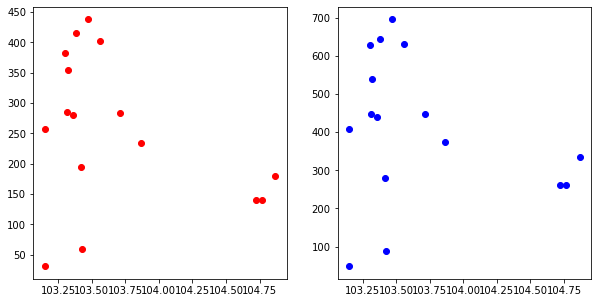

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_weak['Splitting'], df_weak['Diad1_Area'], 'or')
ax2.plot(df_weak['Splitting'], df_weak['Diad2_Area'], 'ob')

df_not_too_weak=df_weak.loc[(df_weak['Diad1_Area']>25) & (df_weak['Diad2_Area']>30)]

## Extracting metadata for these diads

In [49]:


# Put the common string you can in all your Ne lines here
ID_str='.txt'
file_ext_meta='.txt' # Will only take files of this type 
exclude_str='NE' # Will exclude files of this type, sometimes images have same name
prefix=True # Leave as none unless witec appended a number
diad_meta=pf.get_Ne_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=True)

diad_meta#[0:20]


['DE (1).txt',
 'DE (2).txt',
 'DE.txt',
 'LM0 G1 MI1 PHOTO ZSTACK.txt',
 'LM0 G1 MI1 PHOTO.txt',
 'LM0 G1 MI1.txt',
 'LM0 G1 MI2 PHOTO.txt',
 'LM0 G1 MI2.txt',
 'LM0 G10 MI1 PHOTO.txt',
 'LM0 G10 MI1.txt',
 'LM0 G10 MI2 BUBBLE 1 PHOTO.txt',
 'LM0 G10 MI2 BUBBLE 1.txt',
 'LM0 G10 MI2 BUBBLE 2 PHOTO.txt',
 'LM0 G10 MI2 BUBBLE 2.txt',
 'LM0 G14 MI1 PHOTO.txt',
 'LM0 G14 MI1.txt',
 'LM0 G14 MI2 PHOTO.txt',
 'LM0 G14 MI2.txt',
 'LM0 G18 MI1 PHOTO.txt',
 'LM0 G18 MI1.txt',
 'LM0 G2 MI1 PHOTO.txt',
 'LM0 G2 MI1.txt',
 'LM0 G20 FI1 PHOTO.txt',
 'LM0 G20 FI1.txt',
 'LM0 G20 FI10 PHOTO.txt',
 'LM0 G20 FI10.txt',
 'LM0 G20 FI12 PHOTO.txt',
 'LM0 G20 FI12.txt',
 'LM0 G20 FI2 PHOTO.txt',
 'LM0 G20 FI2.txt',
 'LM0 G20 FI3 PHOTO.txt',
 'LM0 G20 FI3.txt',
 'LM0 G20 FI4 PHOTO.txt',
 'LM0 G20 FI4.txt',
 'LM0 G20 FI5 PHOTO.txt',
 'LM0 G20 FI5.txt',
 'LM0 G20 FI6 PHOTO.txt',
 'LM0 G20 FI6.txt',
 'LM0 G20 FI7 PHOTO.txt',
 'LM0 G20 FI7.txt',
 'LM0 G20 FI8 PHOTO.txt',
 'LM0 G20 FI8.txt',
 'LM0 G20 FI9 PHOTO

In [50]:
meta=pf.stitch_metadata_in_loop(path=meta_path, Allfiles=diad_meta, prefix=False,
                               trupower=True)

100%|███████████████████████████████████████| 104/104 [00:00<00:00, 2667.35it/s]

Done



/Users/kyledayton/opt/anaconda3/lib/python3.9/site-packages/DiadFit/importing_data_files.py:594: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Time_Df_2['index']=Time_Df_2.index


In [51]:
meta['filename']

5                         LM0 G1 MI1.txt
7                         LM0 G1 MI2.txt
21                        LM0 G2 MI1.txt
91                 NO CO2 LM0 G2 MI2.txt
93                 NO CO2 LM0 G2 MI3.txt
83                        LM0 G3 MI1.txt
97                 NO CO2 LM0 G6 MI1.txt
99        NO CO2 LM0 G6 MI2 BUBBLE 1.txt
101       NO CO2 LM0 G6 MI2 BUBBLE 2.txt
103                NO CO2 LM0 G6 MI3.txt
85                  LM0 G7 MI1 CARBS.txt
87                  LM0 G7 MI2 CARBS.txt
89                        LM0 G9 MI1.txt
9                        LM0 G10 MI1.txt
11              LM0 G10 MI2 BUBBLE 1.txt
13              LM0 G10 MI2 BUBBLE 2.txt
15                       LM0 G14 MI1.txt
17                       LM0 G14 MI2.txt
19                       LM0 G18 MI1.txt
23                       LM0 G20 FI1.txt
29                       LM0 G20 FI2.txt
31                       LM0 G20 FI3.txt
33                       LM0 G20 FI4.txt
35                       LM0 G20 FI5.txt
37              

## Stitching metadata and data together

In [52]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],

   file_type='.txt')

file_m

array(['LM0 G1 MI1', 'LM0 G1 MI2', 'LM0 G2 MI1', 'NO CO2 LM0 G2 MI2',
       'NO CO2 LM0 G2 MI3', 'LM0 G3 MI1', 'NO CO2 LM0 G6 MI1',
       'NO CO2 LM0 G6 MI2 BUBBLE 1', 'NO CO2 LM0 G6 MI2 BUBBLE 2',
       'NO CO2 LM0 G6 MI3', 'LM0 G7 MI1 CARBS', 'LM0 G7 MI2 CARBS',
       'LM0 G9 MI1', 'LM0 G10 MI1', 'LM0 G10 MI2 BUBBLE 1',
       'LM0 G10 MI2 BUBBLE 2', 'LM0 G14 MI1', 'LM0 G14 MI2',
       'LM0 G18 MI1', 'LM0 G20 FI1', 'LM0 G20 FI2', 'LM0 G20 FI3',
       'LM0 G20 FI4', 'LM0 G20 FI5', 'LM0 G20 FI6', 'LM0 G20 FI7',
       'LM0 G20 FI8', 'LM0 G20 FI9', 'LM0 G20 FI10',
       'NO CO2 LM0 G20 MI11', 'LM0 G20 FI12', 'LM0 G21 MI1',
       'LM0 G21 MI2', 'LM0 G22 MI1 BUBBLE 1 OF 2',
       'LM0 G22 MI1 BUBBLE 2 OF 2', 'LM0 G22 MI1 BUBBLE 2 OF 2 (1)',
       'LM0 G22 MI2', 'LM0 G22 MI3', 'LM0 G23 MI1',
       'LM0 G23 MI2 100X NO CO2', 'LM0 G23 MI2 50X NO CO2',
       'LM0 G23 MI2 NO CO2', 'LM0 G24 MI1', 'LM0 G24 MI2 NO CO2',
       'DE (2)', 'LM0 G25 FI1', 'LM0 G25 MI2', 'LM0 G25 MI3',
   

In [53]:
df_not_too_weak['filename'].head()

0          06 LM0 G2 MI1
0          10 LM0 G3 MI1
0    16 LM0 G7 MI1 CARBS
0    18 LM0 G7 MI2 CARBS
0          20 LM0 G9 MI1
Name: filename, dtype: object

In [54]:
type(df_not_too_weak['filename'])

pandas.core.series.Series

In [55]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(names=df_not_too_weak['filename'].reset_index(drop=True),
    prefix=True, str_prefix=' ',
   file_type='.txt')
file_s

array(['LM0 G2 MI1', 'LM0 G3 MI1', 'LM0 G7 MI1 CARBS', 'LM0 G7 MI2 CARBS',
       'LM0 G9 MI1', 'LM0 G20 FI1', 'LM0 G20 FI2', 'LM0 G20 FI7',
       'LM0 G20 FI10', 'LM0 G21 MI1', 'LM0 G21 MI2',
       'LM0 G22 MI1 BUBBLE 2 OF 2', 'LM0 G22 MI2', 'LM0 G23 MI1',
       'LM0 G25 MI3', 'LM0 G27 MI1'], dtype=object)

In [56]:
# Combining them together
meta['name_for_matching']=file_m
df_not_too_weak['name_for_matching']=file_s
df_combo=df_not_too_weak.merge(meta, on='name_for_matching')

In [57]:
file_s

array(['LM0 G2 MI1', 'LM0 G3 MI1', 'LM0 G7 MI1 CARBS', 'LM0 G7 MI2 CARBS',
       'LM0 G9 MI1', 'LM0 G20 FI1', 'LM0 G20 FI2', 'LM0 G20 FI7',
       'LM0 G20 FI10', 'LM0 G21 MI1', 'LM0 G21 MI2',
       'LM0 G22 MI1 BUBBLE 2 OF 2', 'LM0 G22 MI2', 'LM0 G23 MI1',
       'LM0 G25 MI3', 'LM0 G27 MI1'], dtype=object)

In [58]:
file_m

array(['LM0 G1 MI1', 'LM0 G1 MI2', 'LM0 G2 MI1', 'NO CO2 LM0 G2 MI2',
       'NO CO2 LM0 G2 MI3', 'LM0 G3 MI1', 'NO CO2 LM0 G6 MI1',
       'NO CO2 LM0 G6 MI2 BUBBLE 1', 'NO CO2 LM0 G6 MI2 BUBBLE 2',
       'NO CO2 LM0 G6 MI3', 'LM0 G7 MI1 CARBS', 'LM0 G7 MI2 CARBS',
       'LM0 G9 MI1', 'LM0 G10 MI1', 'LM0 G10 MI2 BUBBLE 1',
       'LM0 G10 MI2 BUBBLE 2', 'LM0 G14 MI1', 'LM0 G14 MI2',
       'LM0 G18 MI1', 'LM0 G20 FI1', 'LM0 G20 FI2', 'LM0 G20 FI3',
       'LM0 G20 FI4', 'LM0 G20 FI5', 'LM0 G20 FI6', 'LM0 G20 FI7',
       'LM0 G20 FI8', 'LM0 G20 FI9', 'LM0 G20 FI10',
       'NO CO2 LM0 G20 MI11', 'LM0 G20 FI12', 'LM0 G21 MI1',
       'LM0 G21 MI2', 'LM0 G22 MI1 BUBBLE 1 OF 2',
       'LM0 G22 MI1 BUBBLE 2 OF 2', 'LM0 G22 MI1 BUBBLE 2 OF 2 (1)',
       'LM0 G22 MI2', 'LM0 G22 MI3', 'LM0 G23 MI1',
       'LM0 G23 MI2 100X NO CO2', 'LM0 G23 MI2 50X NO CO2',
       'LM0 G23 MI2 NO CO2', 'LM0 G24 MI1', 'LM0 G24 MI2 NO CO2',
       'DE (2)', 'LM0 G25 FI1', 'LM0 G25 MI2', 'LM0 G25 MI3',
   

In [59]:
df_combo

,filename_x,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,...,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index
0,06 LM0 G2 MI1,103.358900,1285.659741,280.811359,0.557348,0.557348,1.576263,1389.018641,440.754209,0.415666,...,"September 14, 2022\n",5.051,45.0,5.0,50.0,"['0h', '3m', '47s']",2:31:18 PM\n,52278.0,1324.929,21
1,10 LM0 G3 MI1,103.560679,1285.289770,402.228834,0.606985,0.606985,2.238743,1388.850449,632.006783,0.462231,...,"September 14, 2022\n",5.078,45.0,5.0,50.0,"['0h', '3m', '47s']",2:45:16 PM\n,53116.0,1324.929,83
2,16 LM0 G7 MI1 CARBS,103.313245,1285.735730,284.992185,0.539473,0.539473,1.562218,1389.048975,448.546818,0.415247,...,"September 14, 2022\n",5.040,45.0,5.0,50.0,"['0h', '3m', '47s']",3:06:13 PM\n,54373.0,1324.929,85
3,18 LM0 G7 MI2 CARBS,103.150310,1286.136875,257.129030,0.446026,0.446026,1.778469,1389.287185,409.136123,0.385324,...,"September 14, 2022\n",5.046,45.0,5.0,50.0,"['0h', '3m', '47s']",3:13:30 PM\n,54810.0,1324.929,87
4,20 LM0 G9 MI1,103.381988,1285.626095,415.284828,0.562012,0.562012,2.154207,1389.008083,646.020206,0.419841,...,"September 14, 2022\n",5.048,45.0,5.0,50.0,"['0h', '3m', '47s']",3:21:03 PM\n,55263.0,1324.929,89
5,32 LM0 G20 FI1,104.867851,1282.550699,179.484748,0.541280,0.541280,1.727892,1387.418549,334.330397,0.544834,...,"September 14, 2022\n",5.057,45.0,5.0,100.0,"['0h', '3m', '47s']",4:11:04 PM\n,58264.0,1324.929,23
6,34 LM0 G20 FI2,104.721122,1282.726904,141.070176,0.584379,0.584379,1.574378,1387.448026,262.420138,0.524316,...,"September 14, 2022\n",5.060,45.0,5.0,100.0,"['0h', '3m', '47s']",4:17:52 PM\n,58672.0,1324.929,29
7,44 LM0 G20 FI7,103.865164,1284.541099,234.813632,0.648534,0.648534,1.823200,1388.406262,373.478442,0.483557,...,"September 14, 2022\n",5.069,45.0,5.0,100.0,"['0h', '3m', '47s']",4:56:45 PM\n,61005.0,1324.929,39
8,50 LM0 G20 FI10,104.766832,1282.696387,139.589069,0.539528,0.539528,1.748987,1387.463219,262.467750,0.532278,...,"September 14, 2022\n",5.069,45.0,5.0,100.0,"['0h', '3m', '47s']",5:21:25 PM\n,62485.0,1324.929,25
9,57 LM0 G21 MI1,103.419978,1285.551349,194.077127,0.561830,0.561830,3.003206,1388.971327,280.626576,0.420139,...,"September 14, 2022\n",4.975,45.0,5.0,50.0,"['0h', '3m', '47s']",7:51:28 PM\n,71488.0,1325.000,45


## Now load in the model for doing the Ne fitting

In [60]:
from pickle import load
import pickle
import os
pickle_path=os.getcwd()
file_pkl=pickle_path + '/' + 'Ne_Line_Regression_LM0_09.14.22.pck'
with open(file_pkl, 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

In [61]:
df_combo['Ne_Correction']=my_loaded_model(df_combo['sec since midnight'])
df_combo.insert(1,'Corrected_Splitting', df_combo['Ne_Correction']*df_combo['Splitting'])
df_combo.insert(2, 'Ne Corr', df_combo['Ne_Correction'])

In [62]:
density_df=pf.calculate_density_cornell(temp='SupCrit', Split=df_combo['Corrected_Splitting'])

In [63]:
df_combo.insert(1, 'Density', density_df['Preferred D'])

In [64]:
df_combo.to_clipboard(excel=True)

In [65]:
df_FIs=df_combo.loc[df_combo['filename_x'].str.contains('FI')]

In [66]:
df_combo

,filename_x,Density,Corrected_Splitting,Ne Corr,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,...,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index,Ne_Correction
0,06 LM0 G2 MI1,0.290624,103.455599,1.000936,103.358900,1285.659741,280.811359,0.557348,0.557348,1.576263,...,5.051,45.0,5.0,50.0,"['0h', '3m', '47s']",2:31:18 PM\n,52278.0,1324.929,21,1.000936
1,10 LM0 G3 MI1,0.380126,103.656983,1.000930,103.560679,1285.289770,402.228834,0.606985,0.606985,2.238743,...,5.078,45.0,5.0,50.0,"['0h', '3m', '47s']",2:45:16 PM\n,53116.0,1324.929,83,1.000930
2,16 LM0 G7 MI1 CARBS,0.270273,103.408488,1.000922,103.313245,1285.735730,284.992185,0.539473,0.539473,1.562218,...,5.040,45.0,5.0,50.0,"['0h', '3m', '47s']",3:06:13 PM\n,54373.0,1324.929,85,1.000922
3,18 LM0 G7 MI2 CARBS,0.201691,103.245125,1.000919,103.150310,1286.136875,257.129030,0.446026,0.446026,1.778469,...,5.046,45.0,5.0,50.0,"['0h', '3m', '47s']",3:13:30 PM\n,54810.0,1324.929,87,1.000919
4,20 LM0 G9 MI1,0.299831,103.476734,1.000916,103.381988,1285.626095,415.284828,0.562012,0.562012,2.154207,...,5.048,45.0,5.0,50.0,"['0h', '3m', '47s']",3:21:03 PM\n,55263.0,1324.929,89,1.000916
5,32 LM0 G20 FI1,0.947659,104.962228,1.000900,104.867851,1282.550699,179.484748,0.541280,0.541280,1.727892,...,5.057,45.0,5.0,100.0,"['0h', '3m', '47s']",4:11:04 PM\n,58264.0,1324.929,23,1.000900
6,34 LM0 G20 FI2,0.901082,104.815154,1.000898,104.721122,1282.726904,141.070176,0.584379,0.584379,1.574378,...,5.060,45.0,5.0,100.0,"['0h', '3m', '47s']",4:17:52 PM\n,58672.0,1324.929,29,1.000898
7,44 LM0 G20 FI7,0.519607,103.957318,1.000887,103.865164,1284.541099,234.813632,0.648534,0.648534,1.823200,...,5.069,45.0,5.0,100.0,"['0h', '3m', '47s']",4:56:45 PM\n,61005.0,1324.929,39,1.000887
8,50 LM0 G20 FI10,0.915707,104.859165,1.000881,104.766832,1282.696387,139.589069,0.539528,0.539528,1.748987,...,5.069,45.0,5.0,100.0,"['0h', '3m', '47s']",5:21:25 PM\n,62485.0,1324.929,25,1.000881
9,57 LM0 G21 MI1,0.313915,103.508862,1.000859,103.419978,1285.551349,194.077127,0.561830,0.561830,3.003206,...,4.975,45.0,5.0,50.0,"['0h', '3m', '47s']",7:51:28 PM\n,71488.0,1325.000,45,1.000859


In [67]:
df_combo.to_excel('LM0_lowrho_091422_MIs_FIs.xlsx')